Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: 41.73
Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: 28.87
Mean Squared Error (MSE) für den gewichteten Durchschnitt: 30.75
Mean Squared Error (MSE) für die lineare Regression: 61.02


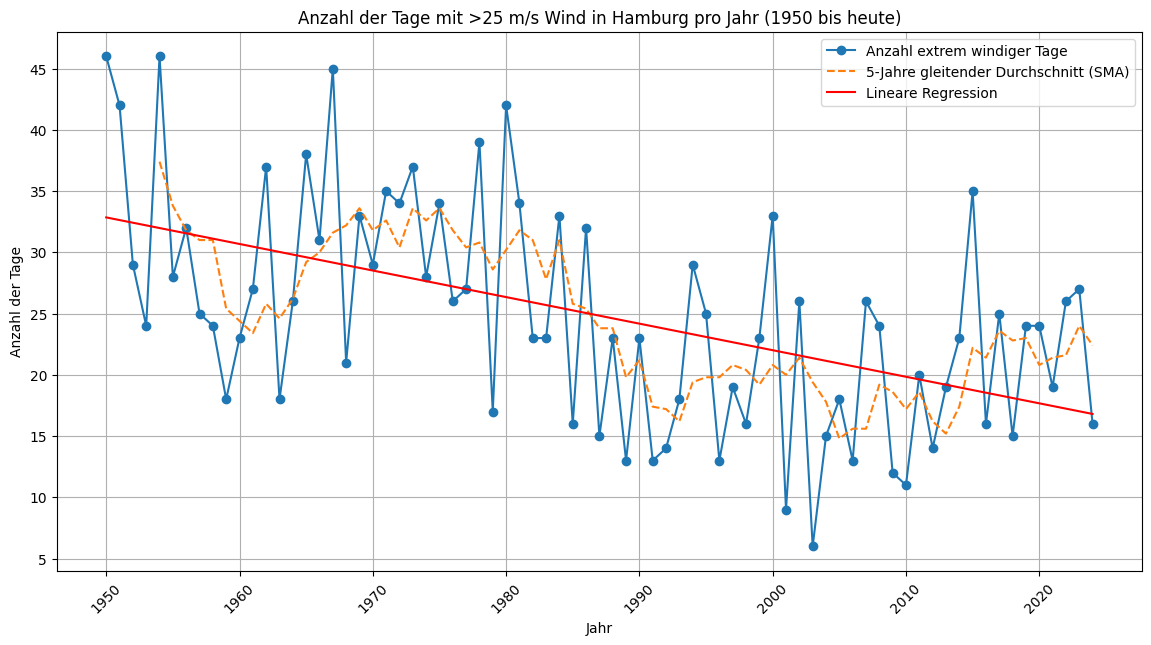

In [5]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Definiere einen Schwellenwert für extreme Windereignisse (z.B. 25 m/s)
    extreme_wind_threshold = 25  # m/s

    # Finde Tage mit max. Windgeschwindigkeit über dem Schwellenwert
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold

    # Zähle die Anzahl der Tage mit extremem Wind pro Jahr
    extreme_wind_days_per_year = data.resample('Y').sum()['extreme_wind']

    # 1. Einfacher gleitender Durchschnitt (SMA)
    extreme_wind_days_per_year_ma = extreme_wind_days_per_year.rolling(window=5).mean()

    # 2. Exponentieller gleitender Durchschnitt (EMA)
    extreme_wind_days_per_year_ema = extreme_wind_days_per_year.ewm(span=5).mean()

    # 3. Gewichteter Durchschnitt
    weights = np.arange(1, 6)
    extreme_wind_days_weighted_average = extreme_wind_days_per_year.rolling(window=5).apply(
        lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), raw=True
    )

    # Berechne das Mean Squared Error (MSE) für den gleitenden Durchschnitt
    mse_ma = mean_squared_error(extreme_wind_days_per_year[4:], extreme_wind_days_per_year_ma[4:])
    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt: {mse_ma:.2f}')

    # Berechne das Mean Squared Error (MSE) für den EMA
    mse_ema = mean_squared_error(extreme_wind_days_per_year[4:], extreme_wind_days_per_year_ema[4:])
    print(f'Mean Squared Error (MSE) für den exponenziellen gleitenden Durchschnitt: {mse_ema:.2f}')

    # Berechne das Mean Squared Error (MSE) für den gewichteten Durchschnitt
    mse_weighted = mean_squared_error(extreme_wind_days_per_year[4:], extreme_wind_days_weighted_average[4:])
    print(f'Mean Squared Error (MSE) für den gewichteten Durchschnitt: {mse_weighted:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = extreme_wind_days_per_year.index.year.values.reshape(-1, 1)
    values = extreme_wind_days_per_year.values

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression: {mse_regression:.2f}')

    # Plot der Anzahl der extremen Windtage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(extreme_wind_days_per_year.index.year, extreme_wind_days_per_year, marker='o', linestyle='-', label='Anzahl extrem windiger Tage')
    plt.plot(extreme_wind_days_per_year.index.year, extreme_wind_days_per_year_ma, linestyle='--', label='5-Jahre gleitender Durchschnitt (SMA)')
    plt.plot(extreme_wind_days_per_year.index.year, trend_line, linestyle='-', color='red', label='Lineare Regression')
    plt.title(f'Anzahl der Tage mit >{extreme_wind_threshold} m/s Wind in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    

Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt (prozentual): 2268.10
Mean Squared Error (MSE) für den exponentiellen gleitenden Durchschnitt (prozentual): 1708.59
Mean Squared Error (MSE) für den gewichteten Durchschnitt (prozentual): 1803.58
Mean Squared Error (MSE) für die lineare Regression (prozentual): 2760.84


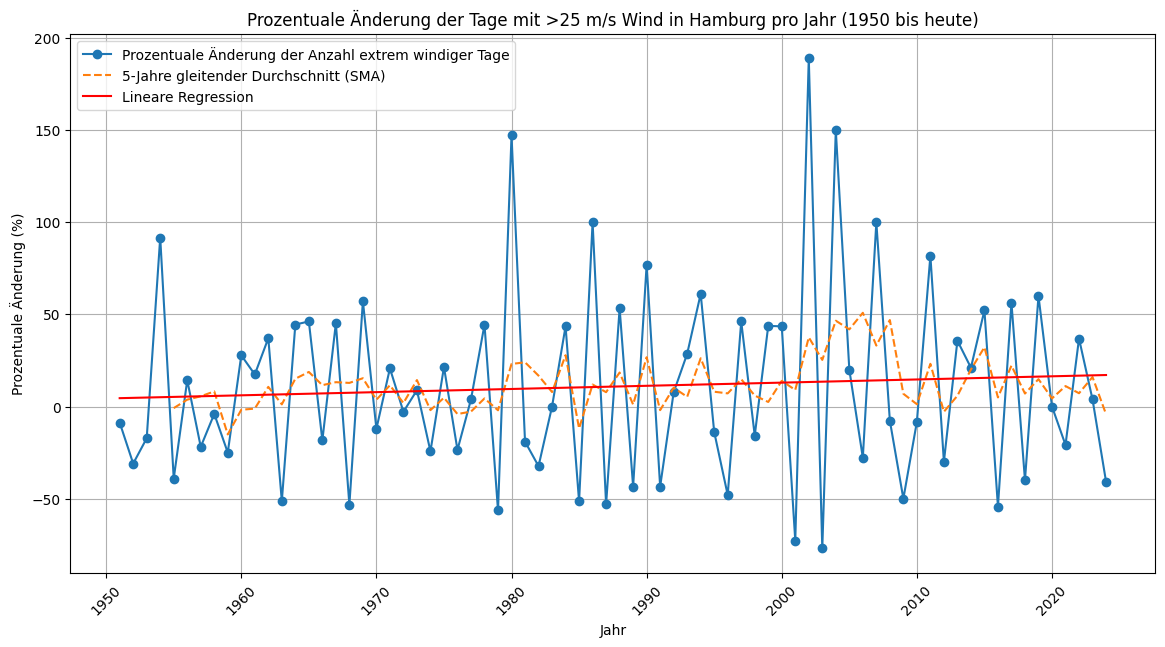

In [4]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Definiere einen Schwellenwert für extreme Windereignisse (z.B. 25 m/s)
    extreme_wind_threshold = 25  # m/s

    # Finde Tage mit max. Windgeschwindigkeit über dem Schwellenwert
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold

    # Zähle die Anzahl der Tage mit extremem Wind pro Jahr
    extreme_wind_days_per_year = data.resample('Y').sum()['extreme_wind']

    # Berechne die prozentuale jährliche Änderung
    percentage_change = extreme_wind_days_per_year.pct_change() * 100

    # Rollende Mittelwerte der prozentualen Änderungen
    percentage_change_ma = percentage_change.rolling(window=5).mean()
    percentage_change_ema = percentage_change.ewm(span=5).mean()
    weights = np.arange(1, 6)
    percentage_change_weighted = percentage_change.rolling(window=5).apply(
        lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), raw=True
    )

    # Berechne das Mean Squared Error (MSE) für die Methoden
    mse_ma = mean_squared_error(percentage_change[5:], percentage_change_ma[5:])
    mse_ema = mean_squared_error(percentage_change[5:], percentage_change_ema[5:])
    mse_weighted = mean_squared_error(percentage_change[5:], percentage_change_weighted[5:])

    print(f'Mean Squared Error (MSE) für 5-Jahre gleitender Durchschnitt (prozentual): {mse_ma:.2f}')
    print(f'Mean Squared Error (MSE) für den exponentiellen gleitenden Durchschnitt (prozentual): {mse_ema:.2f}')
    print(f'Mean Squared Error (MSE) für den gewichteten Durchschnitt (prozentual): {mse_weighted:.2f}')

    # Vorbereitung der Daten für lineare Regression
    years = extreme_wind_days_per_year.index.year.values[1:].reshape(-1, 1) # Überspringe das erste Jahr wegen pct_change()
    values = percentage_change.values[1:]  # Überspringe den ersten Wert (NaN von pct_change())

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(years, values)

    # Vorhersagen für die Regression
    trend_line = model.predict(years)

    # Berechne das Mean Squared Error (MSE) für das lineare Regressionsmodell
    mse_regression = mean_squared_error(values, trend_line)
    print(f'Mean Squared Error (MSE) für die lineare Regression (prozentual): {mse_regression:.2f}')

    # Plot der prozentualen Änderung der extremen Windtage pro Jahr mit Trends
    plt.figure(figsize=(14, 7))
    plt.plot(extreme_wind_days_per_year.index.year[1:], percentage_change[1:], marker='o', linestyle='-',
             label='Prozentuale Änderung der Anzahl extrem windiger Tage')
    plt.plot(extreme_wind_days_per_year.index.year[1:], percentage_change_ma[1:], linestyle='--',
             label='5-Jahre gleitender Durchschnitt (SMA)')
    plt.plot(extreme_wind_days_per_year.index.year[1:], trend_line, linestyle='-', color='red',
             label='Lineare Regression')
    plt.title(f'Prozentuale Änderung der Tage mit >{extreme_wind_threshold} m/s Wind in Hamburg pro Jahr (1950 bis heute)')
    plt.xlabel('Jahr')
    plt.ylabel('Prozentuale Änderung (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


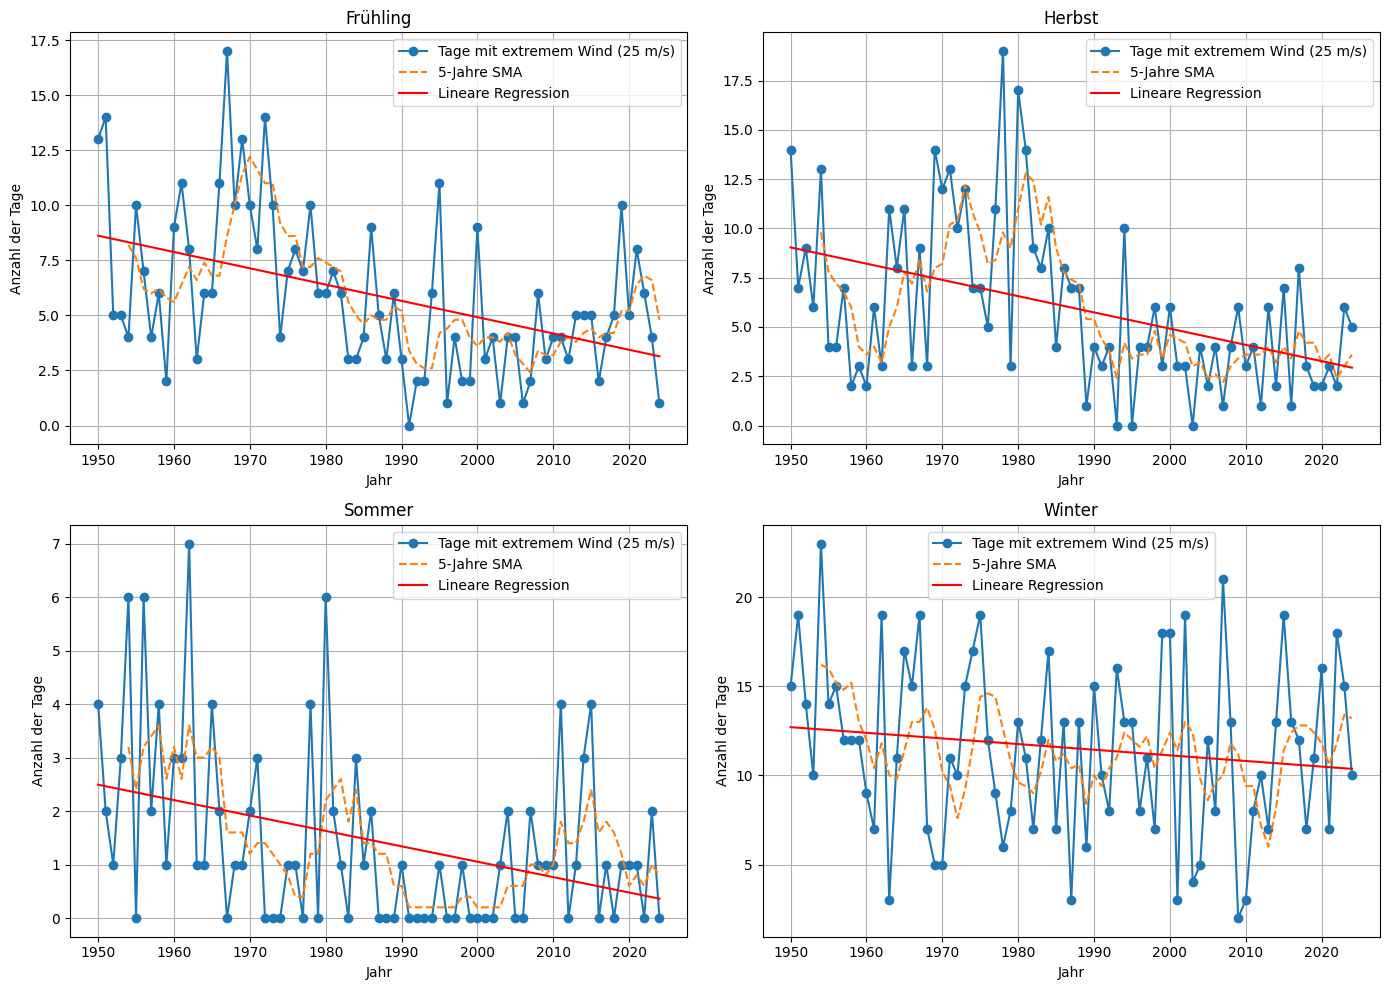

In [3]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Definiere einen Schwellenwert für extreme Windereignisse (z.B. 25 m/s)
    extreme_wind_threshold = 25  # m/s

    # Finde Tage mit max. Windgeschwindigkeit über dem Schwellenwert
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold

    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage mit extremem Wind pro Jahr und Saison
    extreme_wind_days_per_season = data.groupby([data.index.year, 'season_name']).sum()['extreme_wind'].unstack()

    # Plot für jede Jahreszeit separat
    plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(extreme_wind_days_per_season.columns, start=1):
        ax = plt.subplot(2, 2, i)
        
        # Original und gleitende Durchschnitte
        extreme_wind_season = extreme_wind_days_per_season[season]
        extreme_wind_season_ma = extreme_wind_season.rolling(window=5).mean()
        extreme_wind_season_ema = extreme_wind_season.ewm(span=5).mean()
        
        # Gewichteter Durchschnitt
        weights = np.arange(1, 6)
        extreme_wind_season_weighted_avg = extreme_wind_season.rolling(window=5).apply(
            lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), 
            raw=True
        )

        # Lineare Regression
        years = extreme_wind_days_per_season.index.get_level_values(0).values.reshape(-1, 1)
        values = extreme_wind_season.values

        model = LinearRegression()
        model.fit(years, values)
        trend_line = model.predict(years)
        
        # Plot
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season, marker='o', linestyle='-', label='Tage mit extremem Wind (25 m/s)')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season_ma, linestyle='--', label='5-Jahre SMA')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), trend_line, linestyle='-', color='red', label='Lineare Regression')
        ax.set_title(f'{season}')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    

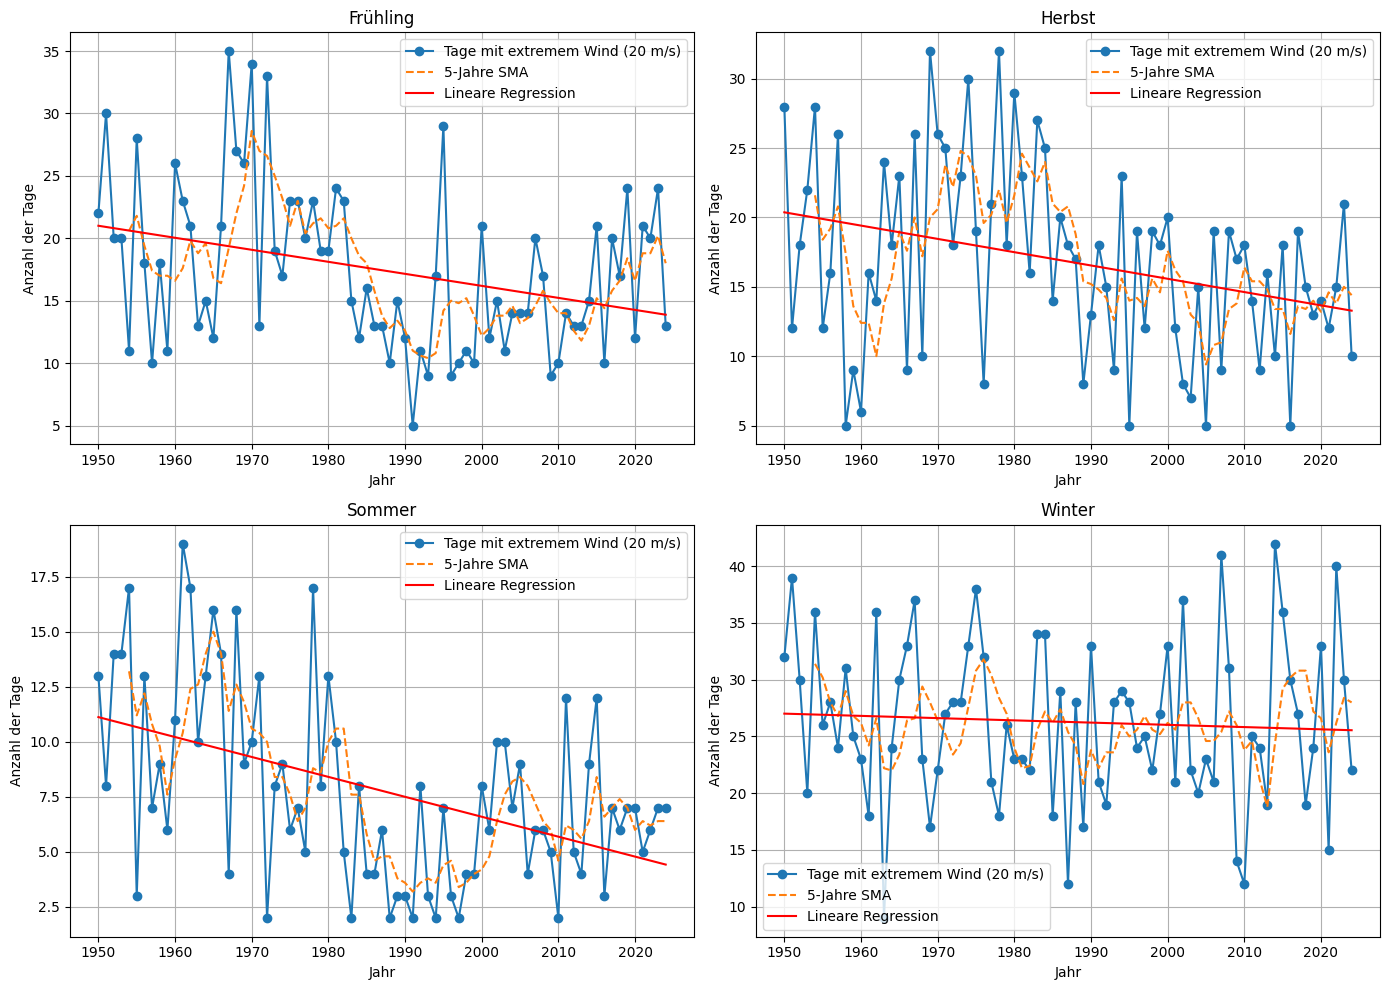

In [2]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Definiere einen Schwellenwert für extreme Windereignisse (z.B. 25 m/s)
    extreme_wind_threshold = 20  # m/s

    # Finde Tage mit max. Windgeschwindigkeit über dem Schwellenwert
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold

    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage mit extremem Wind pro Jahr und Saison
    extreme_wind_days_per_season = data.groupby([data.index.year, 'season_name']).sum()['extreme_wind'].unstack()

    # Plot für jede Jahreszeit separat
    plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(extreme_wind_days_per_season.columns, start=1):
        ax = plt.subplot(2, 2, i)
        
        # Original und gleitende Durchschnitte
        extreme_wind_season = extreme_wind_days_per_season[season]
        extreme_wind_season_ma = extreme_wind_season.rolling(window=5).mean()
        extreme_wind_season_ema = extreme_wind_season.ewm(span=5).mean()
        
        # Gewichteter Durchschnitt
        weights = np.arange(1, 6)
        extreme_wind_season_weighted_avg = extreme_wind_season.rolling(window=5).apply(
            lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), 
            raw=True
        )

        # Lineare Regression
        years = extreme_wind_days_per_season.index.get_level_values(0).values.reshape(-1, 1)
        values = extreme_wind_season.values

        model = LinearRegression()
        model.fit(years, values)
        trend_line = model.predict(years)
        
        # Plot
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season, marker='o', linestyle='-', label='Tage mit extremem Wind (20 m/s)')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season_ma, linestyle='--', label='5-Jahre SMA')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), trend_line, linestyle='-', color='red', label='Lineare Regression')
        ax.set_title(f'{season}')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    

MSE für Frühling: 37.71
MSE für Herbst: 42.29
MSE für Sommer: 14.66
MSE für Winter: 51.78


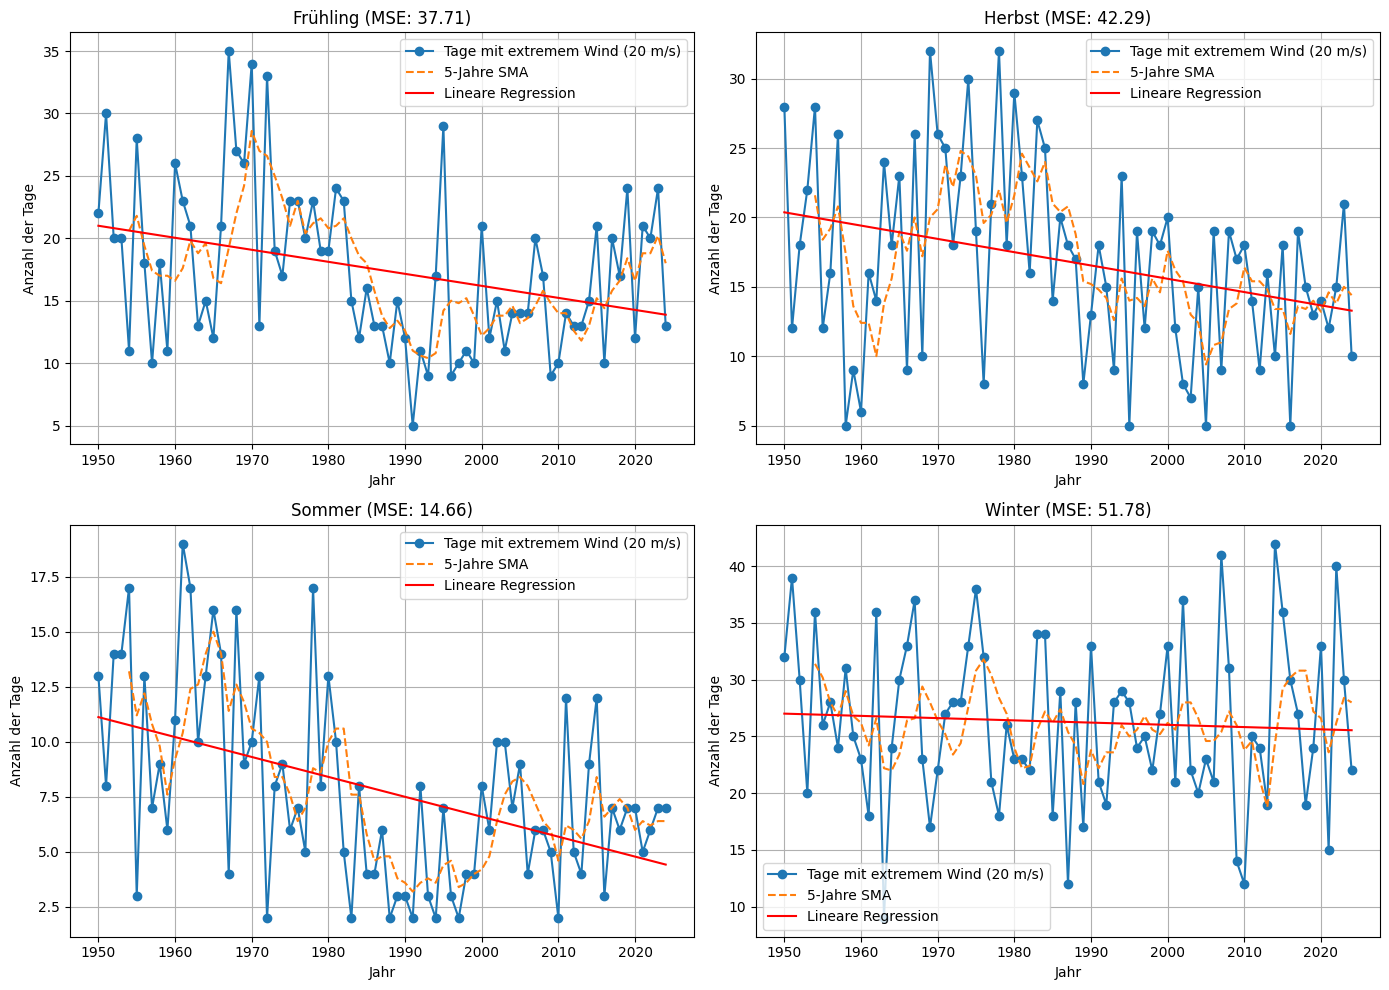

In [6]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Definiere einen Schwellenwert für extreme Windereignisse (z.B. 25 m/s)
    extreme_wind_threshold = 20  # m/s

    # Finde Tage mit max. Windgeschwindigkeit über dem Schwellenwert
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold

    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage mit extremem Wind pro Jahr und Saison
    extreme_wind_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['extreme_wind'].unstack()

    # Plot für jede Jahreszeit separat
    plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(extreme_wind_days_per_season.columns, start=1):
        ax = plt.subplot(2, 2, i)
        
        # Original und gleitende Durchschnitte
        extreme_wind_season = extreme_wind_days_per_season[season]
        extreme_wind_season_ma = extreme_wind_season.rolling(window=5).mean()
        extreme_wind_season_ema = extreme_wind_season.ewm(span=5).mean()
        
        # Gewichteter Durchschnitt
        weights = np.arange(1, 6)
        extreme_wind_season_weighted_avg = extreme_wind_season.rolling(window=5).apply(
            lambda x: np.dot(x, weights[:len(x)]) / weights[:len(x)].sum(), 
            raw=True
        )

        # Lineare Regression
        years = extreme_wind_days_per_season.index.get_level_values(0).values.reshape(-1, 1)
        values = extreme_wind_season.values

        model = LinearRegression()
        model.fit(years, values)
        trend_line = model.predict(years)
        
        # Berechne den MSE
        mse = mean_squared_error(values, trend_line)
        print(f'MSE für {season}: {mse:.2f}')
        
        # Plot
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season, marker='o', linestyle='-', label='Tage mit extremem Wind (20 m/s)')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), extreme_wind_season_ma, linestyle='--', label='5-Jahre SMA')
        ax.plot(extreme_wind_days_per_season.index.get_level_values(0), trend_line, linestyle='-', color='red', label='Lineare Regression')
        
        ax.set_title(f'{season} (MSE: {mse:.2f})')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()